In [16]:
import os 
import sys 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd



repo_root = os.path.abspath(os.path.join(os.getcwd(), '..',))
sys.path.append(repo_root)

from src.utils.file_handlers import group_dataset_files, read_dataset_files
from src.models.BradleyTerry import compute_predicted_ratings_HO_BT
from src.models.zermello import compute_predicted_ratings_plackett_luce
from src.utils.metrics import measure_likelihood, measure_leadership_likelihood, measure_tau
from src.utils.operation_helpers import run_models_synthetic, run_models, split_games
from sklearn.model_selection import train_test_split
from src.utils.c_operation_helpers import run_simulation_synthetic, run_simulation, run_simulation_convergence

In [17]:

def average_convergence (filein_idx, filein_data, model, ratio, T):
    
    ho = []
    z = []
    bin = []
    binz = []

    for t in range(0, T):
        results_dict = run_simulation_convergence(filein_idx, filein_data, model, ratio)
        ho.append(len(results_dict['HO']['rms_convergence_criteria']))
        z.append(len(results_dict['Z']['rms_convergence_criteria']))
        bin.append(len(results_dict['BIN']['rms_convergence_criteria']))
        binz.append(len(results_dict['BINZ']['rms_convergence_criteria']))
        
    print("============== Iterations until convergence ==============")
    print(f" Ours- Higher Order: { np.mean(ho)}")
    print(f" Zermello- Higher Order: { np.mean(z)}")
    print(f" Ours- binary: { np.mean(bin)}")
    print(f" Zermello- bin: { np.mean(binz)}")
        

def plot_convergence(convergence_results_dict):
    # Iterate through each category in the dictionary
    plt.figure(figsize=(10, 6))
   

    plt.plot(convergence_results_dict['HO']['rms_convergence_criteria'][:1000], label='Ours-Higher Order')
    plt.plot(convergence_results_dict['Z']['rms_convergence_criteria'][:1000], label='Zermello-Higher Order')
    plt.plot(convergence_results_dict['BIN']['rms_convergence_criteria'][:1000], label='Ours-Binary Projection')
    plt.plot(convergence_results_dict['BINZ']['rms_convergence_criteria'][:1000], label='Zermello-Binary Projection')

    plt.xlabel("Iterations")
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel("RMS Error")
    plt.title(f"Iterations until convergence")
    plt.legend(loc="best")
    
    plt.show()






## UCL 

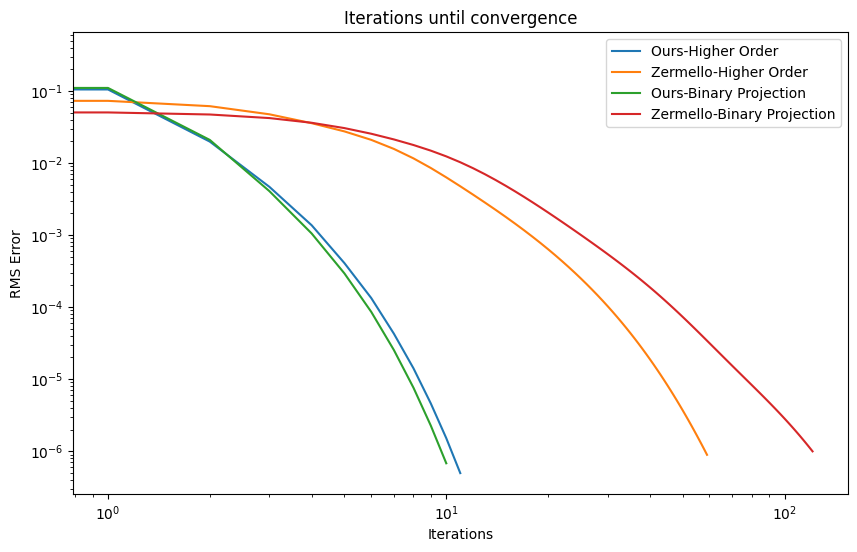

In [18]:
filein_idx = '../datasets/Real_Data/00102_nodes.txt'
filein_data = '../datasets/Real_Data/00102_edges.txt'


T = 1000
ratio = 0.8
model = 0

data_cl = run_simulation_convergence(filein_idx, filein_data, model, ratio)
plot_convergence(data_cl)


In [19]:
filein_idx = '../datasets/Real_Data/00102_nodes.txt'
filein_data = '../datasets/Real_Data/00102_edges.txt'


T = 1000
average_convergence(filein_idx, filein_data, model, ratio, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 11.799
 Zermello- Higher Order: 59.426
 Ours- binary: 10.97
 Zermello- bin: 124.183


## World Cup Data

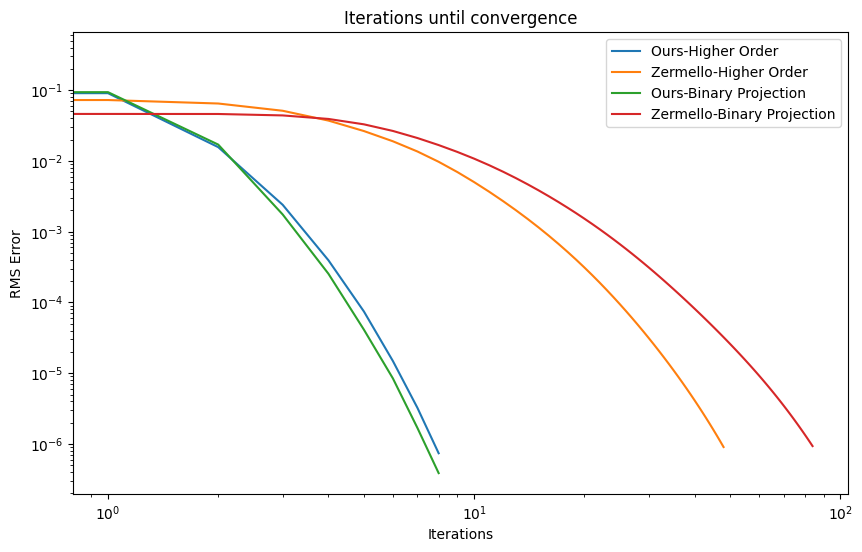

In [20]:
filein_idx = '../datasets/Real_Data/00103_nodes.txt'
filein_data = '../datasets/Real_Data/00103_edges.txt'


T = 1000
ratio = 0.8
model = 1

data_cl = run_simulation_convergence (filein_idx, filein_data, model, ratio)
plot_convergence(data_cl)

In [21]:
filein_idx = '../datasets/Real_Data/00103_nodes.txt'
filein_data = '../datasets/Real_Data/00103_edges.txt'


T = 1000
average_convergence(filein_idx, filein_data, model, ratio, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 9.441
 Zermello- Higher Order: 50.341
 Ours- binary: 9.051
 Zermello- bin: 87.269


## AGH Course Selection

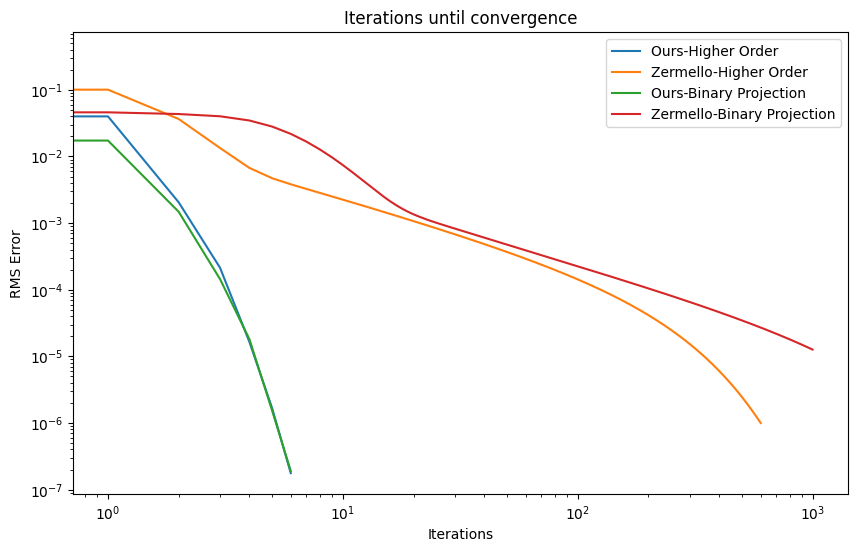

In [22]:
filein_idx = '../datasets/Real_Data/00009_nodes.txt'
filein_data = '../datasets/Real_Data/00009_edges.txt'



T = 1
ratio = 0.8
model = 1

data_cl = run_simulation_convergence (filein_idx, filein_data, model, ratio)
plot_convergence(data_cl)

In [23]:
filein_idx = '../datasets/Real_Data/00009_nodes.txt'
filein_data = '../datasets/Real_Data/00009_edges.txt'

T = 20
average_convergence(filein_idx, filein_data, model, ratio, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 6.9
 Zermello- Higher Order: 601.05
 Ours- binary: 7.0
 Zermello- bin: 2989.95


## Wolf (Binary)

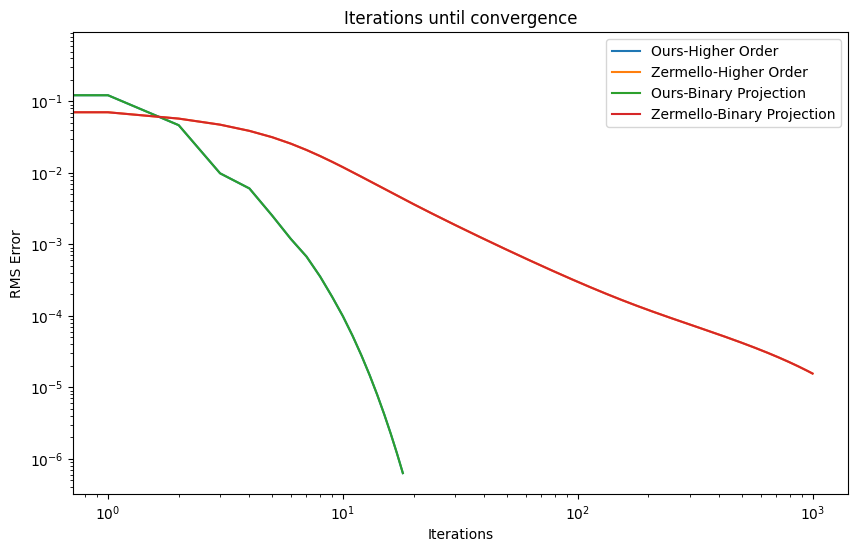

In [24]:
filein_idx = '../datasets/Real_Data/00105_nodes.txt'
filein_data = '../datasets/Real_Data/00105_edges.txt'

data_cl = run_simulation_convergence (filein_idx, filein_data, model, ratio)
plot_convergence(data_cl)

In [25]:

filein_idx = '../datasets/Real_Data/00105_nodes.txt'
filein_data = '../datasets/Real_Data/00105_edges.txt'

T = 1
average_convergence(filein_idx, filein_data, model, ratio, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 19.0
 Zermello- Higher Order: 2768.0
 Ours- binary: 19.0
 Zermello- bin: 2768.0


### Horse Racing

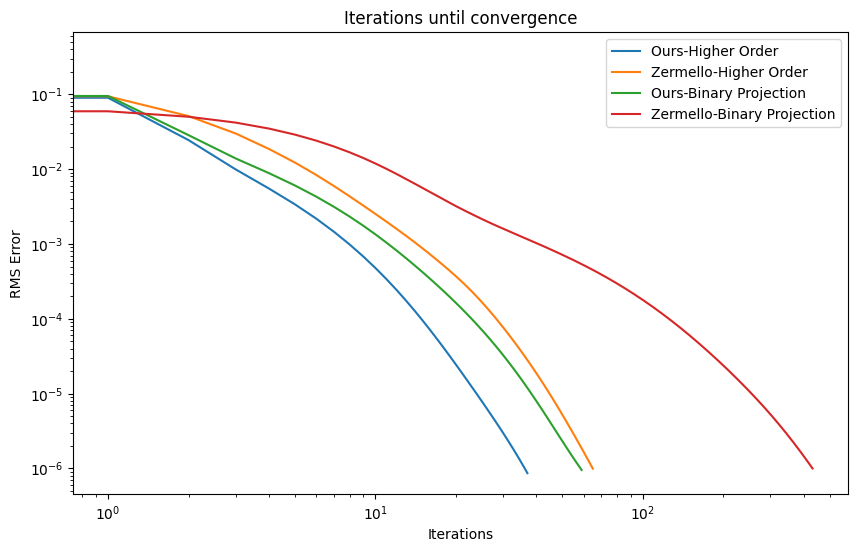

In [27]:
filein_idx = '../datasets/Real_Data/00101_nodes.txt'
filein_data = '../datasets/Real_Data/00101_edges.txt'

data_cl = run_simulation_convergence(filein_idx, filein_data, model, ratio)
plot_convergence(data_cl)

In [29]:
filein_idx = '../datasets/Real_Data/00101_nodes.txt'
filein_data = '../datasets/Real_Data/00101_edges.txt'

T = 1
average_convergence(filein_idx, filein_data, model, ratio, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 43.0
 Zermello- Higher Order: 72.0
 Ours- binary: 85.0
 Zermello- bin: 456.0


### Olympic Swimming

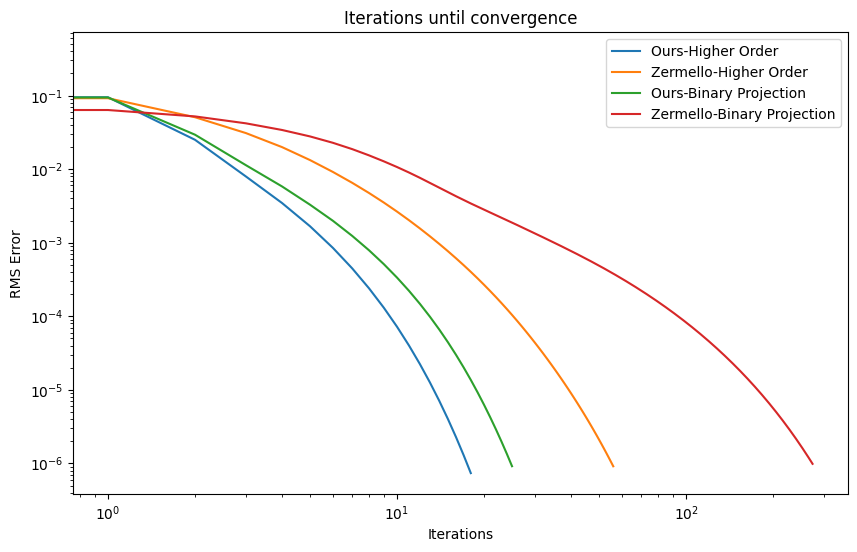

In [30]:
filein_idx = '../datasets/Real_Data/00100_nodes.txt'
filein_data = '../datasets/Real_Data/00100_edges.txt'

data_cl = run_simulation_convergence(filein_idx, filein_data, model, ratio)
plot_convergence(data_cl)

In [31]:
filein_idx = '../datasets/Real_Data/00100_nodes.txt'
filein_data = '../datasets/Real_Data/00100_edges.txt'

T = 1
average_convergence(filein_idx, filein_data, model, ratio, T)

============== Iterations until convergence ==============
 Ours- Higher Order: 20.0
 Zermello- Higher Order: 55.0
 Ours- binary: 29.0
 Zermello- bin: 265.0
